# Installing the required libraries

In [ ]:
!pip install -q yfinance

In [ ]:
!pip install ipywidgets

In [ ]:
!pip install jupyterlab-widgets

In [ ]:
!pip install seaborn

In [ ]:
!pip install pandas_datareader

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

# Making the necessary imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

# For making the notebook interactive
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Filtering out warnings
import warnings
warnings.filterwarnings('ignore')

# Examining the changes in stock prices of different companies over time

In [ ]:
# The companies whose stock data is of interest
companies = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'META']

# Set up End and Start times for data grab
end_date = datetime.now()
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

# Downloading the stock data for the companies
for stock in companies:
    globals()[stock] = yf.download(stock, start_date, end_date)
    

company_abbrv = [AAPL, GOOG, MSFT, AMZN, TSLA, META]
company_names = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA", "FACEBOOK"]


for company, com_name in zip(company_abbrv, company_names):
    company["company_name"] = com_name
    
df = pd.concat(company_abbrv, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-29,203.559998,205.720001,202.539993,205.350006,205.350006,18851100,FACEBOOK
2023-03-30,203.380005,208.089996,202.820007,207.839996,207.839996,22608300,FACEBOOK
2023-03-31,207.240005,212.169998,206.770004,211.940002,211.940002,25412000,FACEBOOK
2023-04-03,208.839996,213.490005,208.199997,213.070007,213.070007,17924600,FACEBOOK
2023-04-04,213.389999,216.240005,212.539993,214.720001,214.720001,21026400,FACEBOOK
2023-04-05,214.149994,215.190002,209.940002,211.479996,211.479996,19396600,FACEBOOK
2023-04-06,209.250000,216.940002,208.649994,216.100006,216.100006,26104400,FACEBOOK
2023-04-10,214.710007,215.660004,210.660004,214.750000,214.750000,16106100,FACEBOOK
2023-04-11,215.479996,216.020004,213.410004,213.850006,213.850006,16710100,FACEBOOK


# Checking for missing values

In [ ]:
df.isna().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

# Descriptive Statistics

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03
mean,167.532371,170.457550,164.615052,167.525487,167.252258,5.982809e+07
std,63.254713,64.287865,61.941986,63.053366,62.770264,4.192717e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,8.567800e+06
25%,113.844999,116.264997,112.440500,114.099752,114.099752,2.738750e+07
50%,149.790001,151.910004,147.770004,150.449997,150.196144,4.935645e+07
75%,220.185829,225.884995,213.567493,220.992500,220.384697,7.796482e+07
max,358.243347,364.073334,332.140015,342.716675,342.716675,3.065906e+08


In [ ]:
df[df['company_name'] == 'GOOGLE'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,104.357143,105.957240,103.002753,104.488302,104.488302,2.878114e+07
std,10.492346,10.652685,10.330792,10.505897,10.505897,1.123204e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,95.749998,97.344997,94.440002,95.835001,95.835001,2.186948e+07
50%,102.799999,104.205002,101.857502,103.549999,103.549999,2.621305e+07
75%,113.247374,115.196749,111.843998,113.490250,113.490250,3.240928e+07
max,131.283997,131.923492,128.438599,130.531006,130.531006,9.779860e+07


## Descriptive analysis about the stocks data of specific companies

In [ ]:
@interact
def descriptive_analysis(company=company_names):
    return df[df['company_name'] == company].tail()

interactive(children=(Dropdown(description='company', options=('APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'TESL…

# Plot of various parameters related to different companies

In [ ]:
@interact
def plot_param(company=company_names, parameter=["Open", "Close", "Adj Close", "Volume"]):
    _dict = {
      "Open": "Opening Stocks Price",
      "Close": "Closing Stocks Price",
      "Adj Close": "Adjacent Closing Stocks Price",
      "Volume": "Sales Volume"
    }
    plt.figure(figsize=(8, 6))
    df[df['company_name'] == company][f"{parameter}"].plot(color="green", linewidth=1)
    plt.ylabel(f"{parameter}", fontdict={"fontsize": 15, "fontfamily": "sans"})
    plt.xlabel("Period of Time", fontdict={"fontsize": 15, "fontfamily": "sans"})
    plt.title(f"{_dict[parameter]} of {company}", fontdict={"fontsize": 22, "fontfamily": "serif"})
    plt.show()
    # plt.tight_layout()

interactive(children=(Dropdown(description='company', options=('APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'TESL…

# Computing the Moving Average of the various stocks

A moving average (MA) is a stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price. A rising moving average indicates that the security is in an uptrend, while a declining moving average indicates a downtrend. The Moving Average is usually taken over a specific period of time like 10 days, 2 weeks, 1 month etc.

In [ ]:
ma_days = [10, 20, 30]  # List indicating the number of days to compute the Moving Average

for ma in ma_days:
    for abbrv in company_abbrv:
        column_name = f"MA for {ma} days"
        abbrv[column_name] = abbrv['Adj Close'].rolling(ma).mean()

In [ ]:
# dataframe_dict = {
#     "APPLE": AAPL,
#     "GOOGLE": GOOG,
#     "MICROSOFT": MSFT,
#     "AMAZON": AMZN
#     }

dataframe_dict = dict(zip(company_names, company_abbrv))


@interact
def plot_ma(company=company_names):
    # plt.figure(figsize=(18,6))
    dataframe_dict[f"{company}"][["Adj Close", f"MA for {ma_days[0]} days", f"MA for {ma_days[1]} days", f"MA for {ma_days[2]} days"]].plot(linewidth=1)
    plt.gcf().set_size_inches(10, 8)
    plt.title(f"{company}'S MOVING AVERAGE", fontdict={"fontsize": 22, "fontfamily": "serif"})
    plt.show()


interactive(children=(Dropdown(description='company', options=('APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'TESL…

# Computing and Visualizing the Daily Returns of the various companies

Daily return on a stock is used to measure the day to day performance of stocks, it is the price of stocks at today’s closure compared to the price of the same stock at yesterday’s closure. Positive daily return means appreciation in stock price on daily comparison.

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_abbrv:
    company['Daily Return'] = company['Adj Close'].pct_change()

In [ ]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [ ]:
@interact
def plot_ma(company=company_names, plot_type=["GRAPH", "HISTOGRAM"]):
    plt.figure(figsize=(10,8))
    if plot_type == "GRAPH":
        dataframe_dict[f"{company}"]['Daily Return'].plot(legend=True, linestyle='-', marker='o', linewidth=1)
    elif plot_type == "HISTOGRAM":
        dataframe_dict[f"{company}"]['Daily Return'].hist(bins=50)
        plt.xlabel('Daily Return', fontdict={"fontsize": 15, "fontfamily": "sans"})
        plt.ylabel('Counts', fontdict={"fontsize": 15, "fontfamily": "sans"})
    plt.title(f"{company}'S DAILY RETURN", fontdict={"fontsize": 22, "fontfamily": "serif"})
    plt.show()


interactive(children=(Dropdown(description='company', options=('APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'TESL…

# Analysing the correlation between the Adj Close prices of different companies

Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables. It expresses the extent to which two variables are linearly related.

In [ ]:
from pandas_datareader import data as pdr
yf.pdr_override()
adj_close_df = pdr.get_data_yahoo(companies, start=start_date, end=end_date)["Adj Close"]

[*********************100%***********************]  6 of 6 completed


In [ ]:
# Make a DataFrame containing the returns of the various companies
company_returns = adj_close_df.pct_change()
company_returns.head()

,AAPL,AMZN,GOOG,META,MSFT,TSLA
Date,,,,,,
2022-04-13,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-14,-0.029988,-0.024653,-0.023280,-0.022373,-0.027084,-0.036552
2022-04-18,-0.001331,0.007109,0.005564,0.002807,0.002466,0.019584
2022-04-19,0.014115,0.034889,0.020084,0.031029,0.017040,0.023758
2022-04-20,-0.001016,-0.026041,-0.017509,-0.077723,0.003715,-0.049555


In [ ]:
@interact
def plot_corr(company1=company_returns.columns, company2=company_returns.columns, kind=["scatter", "reg", "hex", "kde"]):
    sns.jointplot(x=company1, y=company2, data=company_returns, kind=kind, color='seagreen')
    plt.show()


interactive(children=(Dropdown(description='company1', options=('AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'TSLA'…

In [ ]:
@interact
def plot_corr(params=["Stock Return", "Adj Close"]):
    plt.figure(figsize=(8, 6))
    if params == "Stock Return":
        sns.heatmap(company_returns.corr(), annot=True, cmap=plt.cm.CMRmap_r)
        plt.title('Correlation of stock return')
    elif params == "Adj Close":
        sns.heatmap(adj_close_df.corr(), annot=True, cmap=plt.cm.Blues)
        plt.title('Correlation of stock closing price')
    plt.show()

interactive(children=(Dropdown(description='params', options=('Stock Return', 'Adj Close'), value='Stock Retur…

# Getting an intuition of how much we put at risk when we choose to invest in a particular stock

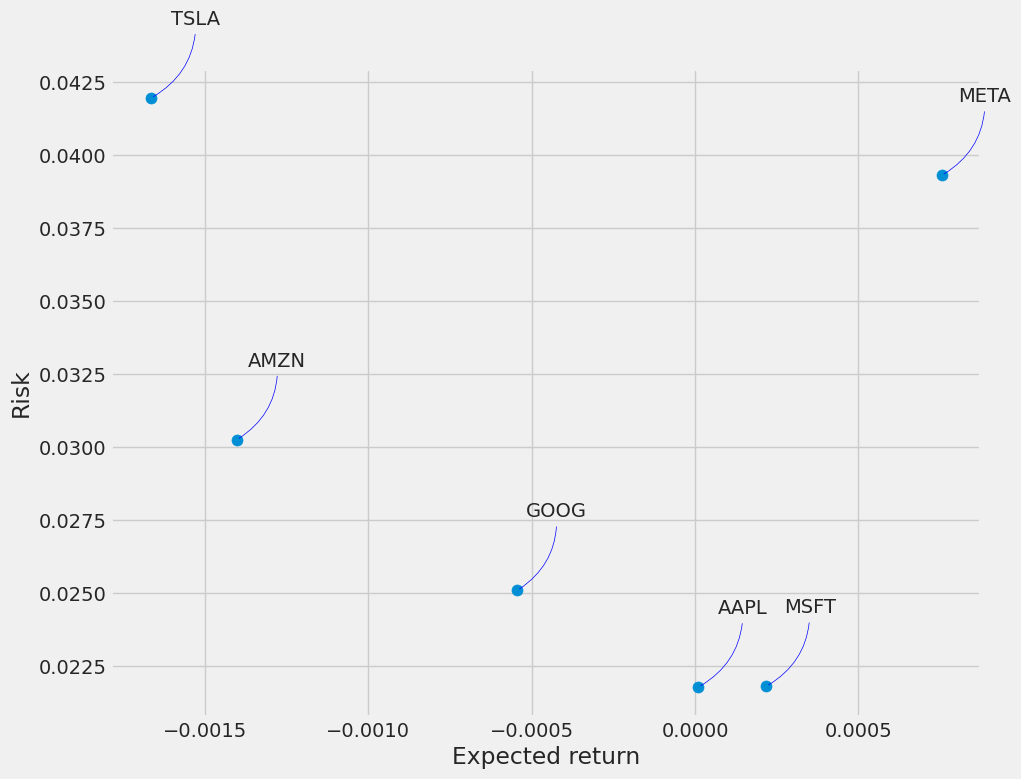

In [ ]:
company_returns = company_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(company_returns.mean(), company_returns.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(company_returns.columns, company_returns.mean(), company_returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Building the model and making predictions

In [ ]:
stocks_data = pdr.get_data_yahoo(companies, start='2012-01-01', end=datetime.now())

[*********************100%***********************]  6 of 6 completed


In [ ]:
stocks_data.tail()

Adj Close                                                  \
                  AAPL        AMZN        GOOG        META        MSFT   
Date                                                                     
2023-04-05  163.759995  101.099998  104.949997  211.479996  284.339996   
2023-04-06  164.660004  102.059998  108.900002  216.100006  291.600006   
2023-04-10  162.029999  102.169998  106.949997  214.750000  289.390015   
2023-04-11  160.800003   99.919998  106.120003  213.850006  282.829987   
2023-04-12  160.100006   97.830002  105.220001  214.000000  283.489990   

                             Close                                      ...  \
                  TSLA        AAPL        AMZN        GOOG        META  ...   
Date                                                                    ...   
2023-04-05  185.520004  163.759995  101.099998  104.949997  211.479996  ...   
2023-04-06  185.059998  164.660004  102.059998  108.900002  216.100006  ...   
2023-04-10  184.509995  162.029999  102.169998  106.949997  214.750000  ...   
2023-04-11  186.789993  160.800003   99.919998  106.120003  213.850006  ...   
2023-04-12  180.539993  160.100006   97.830002  105.220001  214.000000  ...   

                  Open                                        Volume  \
                  GOOG        META        MSFT        TSLA      AAPL   
Date                                                                   
2023-04-05  106.120003  214.149994  285.850006  190.520004  51511700   
2023-04-06  105.769997  209.250000  283.209991  183.080002  45390100   
2023-04-10  107.389999  214.710007  289.209991  179.940002  47716900   
2023-04-11  106.919998  215.479996  285.750000  186.690002  47644200   
2023-04-12  107.389999  214.839996  284.790009  190.740005  50072700   

                                                                 
                AMZN      GOOG        META      MSFT       TSLA  
Date                                                             
2023-04-05  45175400  21864200  19396600.0  22064800  133882500  
2023-04-06  43808000  34684200  26104400.0  29770300  123857900  
2023-04-10  37261200  19741500  16106100.0  23103000  142154600  
2023-04-11  60417800  18721300  16710100.0  27276600  115770900  
2023-04-12  56639400  22742600  18859900.0  27373400  149783500  

[5 rows x 36 columns]

In [ ]:
@interact
def plot_stocks(company_name=companies):
    plt.figure(figsize=(16,6))
    plt.title(f"{company_name} Close Price History", fontdict={"fontsize": 22, "fontfamily": "serif"})
    plt.plot(stocks_data['Close'][company_name], linewidth=1)
    plt.xlabel('Date', fontdict={"fontsize": 17, "fontfamily": "sans"})
    plt.ylabel('Close Price USD ($)', fontdict={"fontsize": 17, "fontfamily": "sans"})
    plt.show()

interactive(children=(Dropdown(description='company_name', options=('AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'M…

# Closing Stocks data of a specified company

In [ ]:
abbreviations = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'META']

In [ ]:
company_name = "MSFT"
company_close_data = stocks_data["Close"][company_name]
company_df = pd.DataFrame(company_close_data)
company_close_data = np.array(company_close_data)
company_close_data = company_close_data.reshape(-1, 1)

# Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(company_close_data)

# Training Set

In [ ]:
# Create the training data set 
# Create the scaled training data set
training_data_len = int(np.ceil( len(company_close_data) * .80 ))
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape



# Building the LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=200, callbacks=[early_stop], validation_split=0.2)

Epoch 1/200
56/56 [==============================] - 31s 306ms/step - loss: 8.0574e-04 - val_loss: 4.7306e-04
Epoch 2/200
56/56 [==============================] - 10s 165ms/step - loss: 3.1800e-05 - val_loss: 3.8923e-04
Epoch 3/200
56/56 [==============================] - 8s 149ms/step - loss: 2.9532e-05 - val_loss: 3.8270e-04
Epoch 4/200
56/56 [==============================] - 7s 130ms/step - loss: 3.0769e-05 - val_loss: 4.6344e-04
Epoch 5/200
56/56 [==============================] - 9s 159ms/step - loss: 2.9154e-05 - val_loss: 5.7515e-04
Epoch 6/200
56/56 [==============================] - 7s 122ms/step - loss: 2.8073e-05 - val_loss: 3.9180e-04
Epoch 7/200
56/56 [==============================] - 9s 159ms/step - loss: 2.9612e-05 - val_loss: 4.3537e-04
Epoch 8/200
56/56 [==============================] - 7s 126ms/step - loss: 2.5761e-05 - val_loss: 3.8984e-04
Epoch 9/200
56/56 [==============================] - 9s 164ms/step - loss: 2.8121e-05 - val_loss: 4.4414e-04
Epoch 10/200
56/5

# Plotting the loss curve

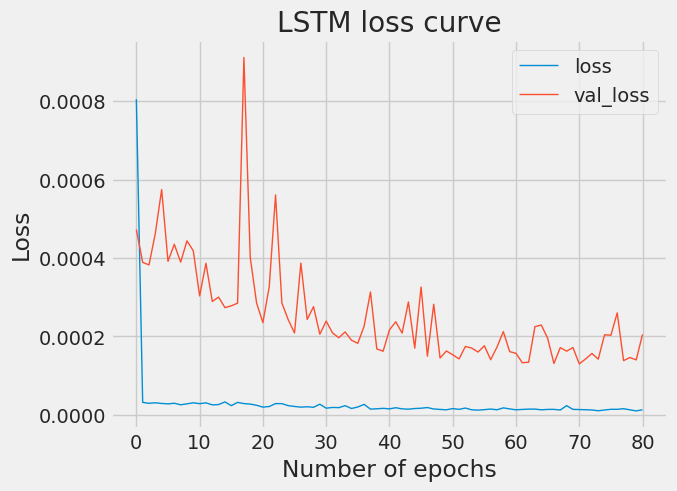

In [ ]:
plt.title('LSTM loss curve')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], linewidth=1, label='loss')
plt.plot(history.history['val_loss'], linewidth=1, label='val_loss')
plt.legend(loc='best')
plt.show()

# Testing Dataset

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = company_close_data[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Making Predictions

In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

18/18 [==============================] - 2s 65ms/step


7.407380675539447

# Plotting the data

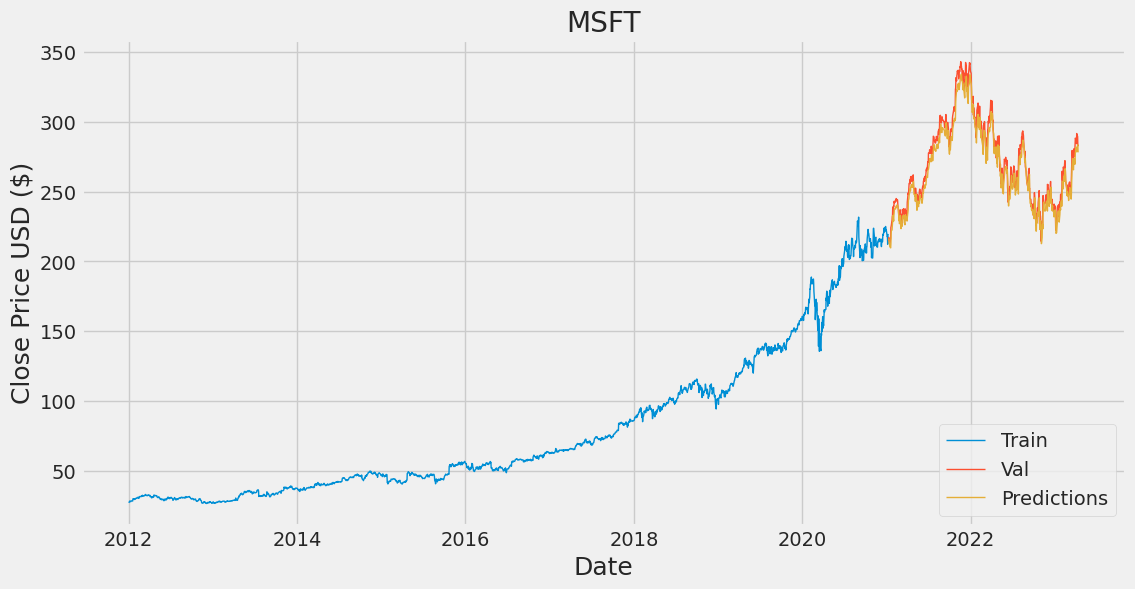

In [ ]:
# Plot the data
train = company_df[:training_data_len]
valid = company_df[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(12,6))
plt.title(f'{company_name}')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[f'{company_name}'], linewidth=1)
plt.plot(valid[[f'{company_name}', 'Predictions']], linewidth=1)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create the figure and add the training and validation data
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train[f'{company_name}'], name='Train', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=valid.index, y=valid[f'{company_name}'], name='Val', line=dict(color='orange')))

# Add the predicted values
fig.add_trace(go.Scatter(x=valid.index, y=valid['Predictions'], name='Predictions', line=dict(color='green')))

# Set the layout of the plot
fig.update_layout(title=f'{company_name}',
                  xaxis_title='Date',
                  yaxis_title='Close Price USD ($)',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  plot_bgcolor='white',
                  height=500)

# Customize the hover text to display the full date
fig.update_traces(hovertemplate='<b>Date:</b> %{x} <br><b>Close Price:</b> %{y:.2f}')

# Display the plot
fig.show()
